<a href="https://colab.research.google.com/github/pvtarun/cv-index/blob/main/cv_EX6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python deepface matplotlib requests


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=9bc90c44061a555d27c98ca0e56448f7d75e130a470c01fee490e6831e02bbf2
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


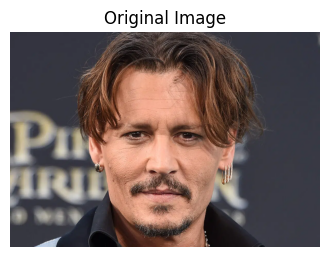

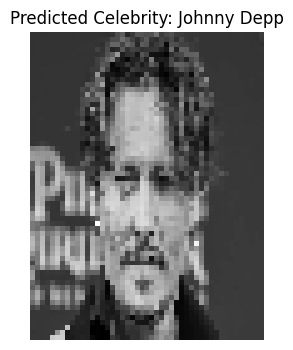

🎯 Predicted Celebrity: Johnny Depp


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 🔹 Step 1: Load and Preprocess Johnny Depp Image
image_path = "/content/jonydepp2.jpg"

try:
    # Load image
    original_image = plt.imread(image_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(original_image)
    plt.axis("off")
    plt.title("Original Image")
    plt.show()

    # Convert to grayscale
    if original_image.ndim == 3:
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)
    else:
        gray_image = original_image

    # Resize to fixed size (e.g., 62x47 like LFW)
    resized_image = cv2.resize(gray_image, (47, 62))

    # Flatten the image
    flattened_image = resized_image.flatten().reshape(1, -1)

    # 🔹 Step 2: Create Dummy Dataset with One Image
    X_train = flattened_image
    y_train = [0]  # Label 0 for Johnny Depp
    target_names = ["Johnny Depp"]

    # 🔹 Step 3: Train Classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)

    # 🔹 Step 4: Predict the Same Image
    predicted_label = knn.predict(flattened_image)[0]
    predicted_name = target_names[predicted_label]

    # 🔹 Step 5: Display Prediction
    plt.figure(figsize=(4, 4))
    plt.imshow(resized_image, cmap="gray")
    plt.axis("off")
    plt.title(f"Predicted Celebrity: {predicted_name}")
    plt.show()

    print(f"🎯 Predicted Celebrity: {predicted_name}")

except Exception as e:
    print(f"❌ Error: {e}")
